# demographic detail for each station area


In [10]:
import pandas as pd

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt
# for basemaps
import contextily as ctx

import folium
from folium.plugins import MarkerCluster
import pandas as pd

import plotly.express as px

In [2]:
stationarea=gpd.read_file("stationarea.geojson")
station=gpd.read_file("stations.geojson")
ethdf=gpd.read_file("ethnicityindex.geojson")
index=gpd.read_file("iqv_average.csv")
stationarea['lon']=station.geometry.x
stationarea['lat']=station.geometry.y
tod=stationarea[stationarea['TOD']=='Yes']
ntod=stationarea[stationarea['TOD']=='No']
station=gpd.read_file('stations.geojson')
tod2=station[stationarea['TOD']=='Yes']
ntod2=station[stationarea['TOD']=='No']

In [4]:
ethdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 60 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID_left                                                            7433 non-null   object  
 1   NAME_left                                                             7433 non-null   object  
 2   Total_2019                                                            7433 non-null   float64 
 3   Non Hispanic_2019                                                     7433 non-null   float64 
 4   Non Hispanic White_2019                                               7433 non-null   float64 
 5   Non Hispanic Black_2019                                               7433 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2019                   7433 non-n

In [ ]:
df2=gpd.overlay(tod,ethdf, how='intersection')

<AxesSubplot:>

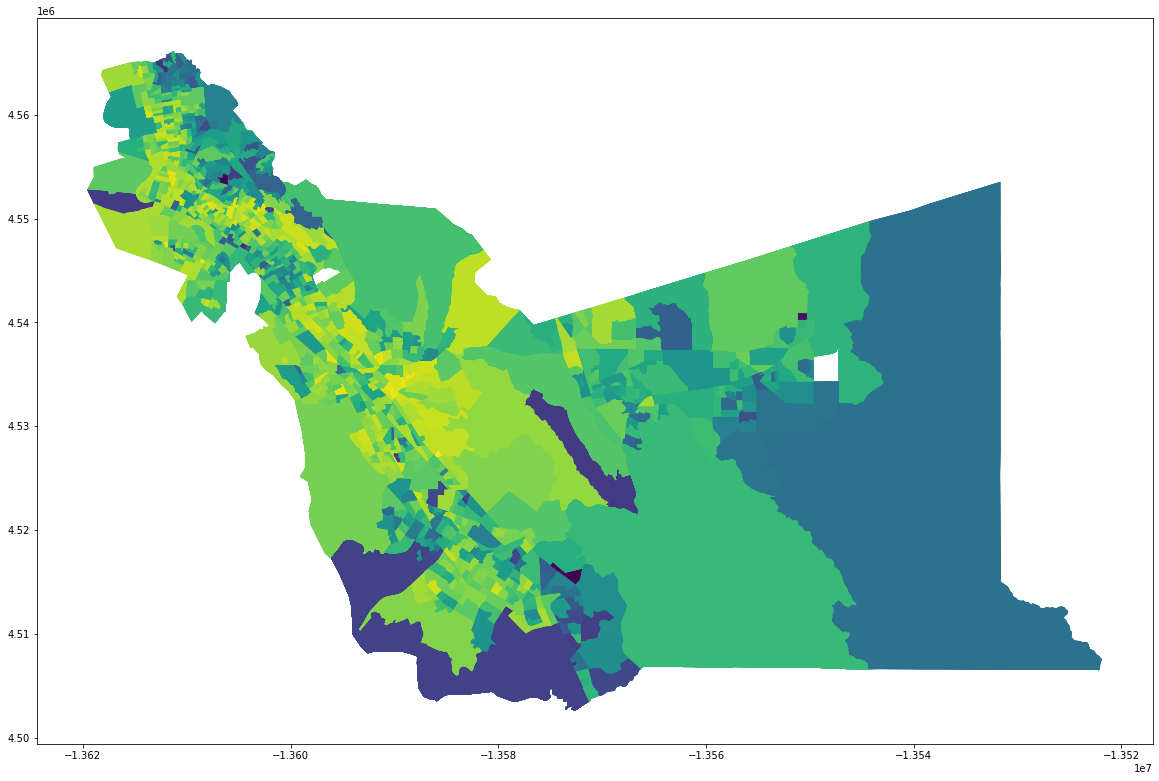

In [5]:
df_wb = ethdf.to_crs(epsg=3857)
st_wb = station.to_crs(epsg=3857)
fig, ax=plt.subplots(figsize=(20,20))
df_wb.plot(ax=ax,
           column='iqv_2019_sq')

In [8]:
df2_wb = df2.to_crs(epsg=3857)

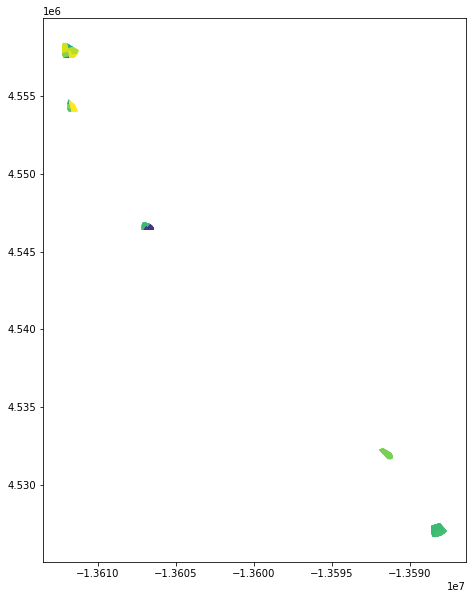

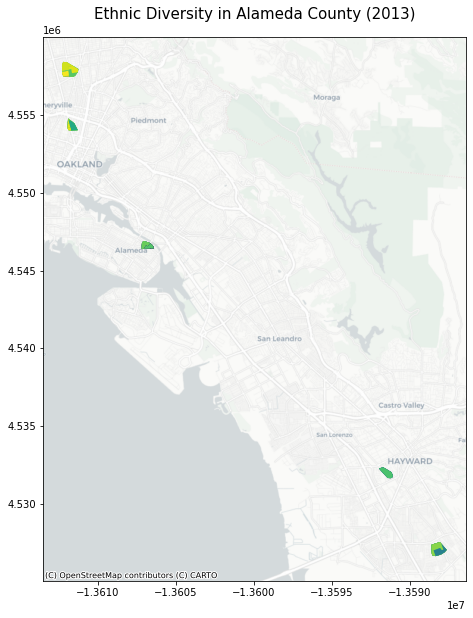

In [9]:
fig, ax=plt.subplots(figsize=(10,10))

df2_wb.plot(ax=ax,
         column='iqv_2019_sq')

fig_wb, ax=plt.subplots(figsize=(10,10))

df2_wb.plot(ax=ax,
         column='iqv_2013_sq')

ax.set_title("Ethnic Diversity in Alameda County (2013)",fontsize=15,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)